<h4>About this tutorial</h4>
<br>1. What's data analysis
<br>2. Real example Data Analysis with Python
<br>3. Intro to Numpy
<br>4. Intro to Pandas
<br>5. Data Cleaning
<br>6. Reading Data SQL, CSVs, APIs, etc
<br>7. Python in Under 10 Minuite

<h4> What is Data Analysis</h4>
<br> A process of inspecting, cleansing, transforming, and modelling data
<br> with the goal of discovering useful infor. ,informing conclusion and supporting decision making

<h4> Data Analysis Process </h4>
<br>1. Data Extraction ^
<br>2. Data Cleaning   | |
<br>3. Data Wrangling  | |
<br>4. Analysis        | |
<br>5. Action          | v

<h4>Sales Dataset</h4>

In [1]:
import requests
import io
import json
import csv
import pandas as pd

In [2]:
url ='https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv'

In [43]:
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print (df.head())

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [44]:
#Convert df to json file
df.to_json('Sales.json', indent = 4)

In [45]:
SalesJSON = pd.read_json('Sales.json')
SalesJSON.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [46]:
#Drop cols
SalesJSON.drop('Day',axis = 'columns', inplace = True)
SalesJSON.drop('Month',axis = 'columns', inplace = True)
#SalesJSON.drop('Year',axis = 'columns', inplace = True) #for today i'm going to look into year first
#So I will drop the other two

In [47]:
SalesJSON.head(3)

,Date,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


In [48]:
#Check null value
SalesJSON.isnull().any() #This specify null in each cols in df
#SalesJSON.isnull().values.any() this return boolean that represent if df has null or not

Date                False
Year                False
Customer_Age        False
Age_Group           False
Customer_Gender     False
Country             False
State               False
Product_Category    False
Sub_Category        False
Product             False
Order_Quantity      False
Unit_Cost           False
Unit_Price          False
Profit              False
Cost                False
Revenue             False
dtype: bool

In [49]:
SalesJSON.describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [50]:
SalesJSON['Year'].sort_values()

56517     2011
69025     2011
69027     2011
69029     2011
69031     2011
          ... 
9735      2016
9733      2016
9732      2016
9742      2016
113035    2016
Name: Year, Length: 113036, dtype: int64

In [51]:
SalesJSON.sort_values(by = ['Year','Customer_Age'], inplace = True)
SalesJSON.reset_index(drop = True, inplace = True)
SalesJSON.head()

,Date,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2011-06-30,2011,17,Youth (<25),M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,745,1252,1997
1,2011-07-11,2011,17,Youth (<25),M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,745,1252,1997
2,2011-07-18,2011,17,Youth (<25),M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4,1252,2295,2979,5008,7987
3,2011-07-05,2011,17,Youth (<25),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-200 Black, 46",3,1252,2295,2027,3756,5783
4,2011-07-01,2011,17,Youth (<25),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-500 Black, 52",4,295,540,699,1180,1879


In [104]:
SalesJSON['Age_Group'].unique()

KeyError: 'Age_Group'

In [62]:
SalesJSON['Customer_Gen'] = SalesJSON['Age_Group'].str.split(" ", expand = True)
SalesJSON.drop('Age_Group', axis = 'columns', inplace = True)

In [105]:
SalesJSON.head()

,Date,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Gen
0,2011-06-30,2016,17,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,745,1252,1997,Youth
1,2011-07-11,2016,17,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,745,1252,1997,Youth
2,2011-07-18,2016,17,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4,1252,2295,2979,5008,7987,Youth
3,2011-07-05,2016,17,M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-200 Black, 46",3,1252,2295,2027,3756,5783,Youth
4,2011-07-01,2016,17,F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-500 Black, 52",4,295,540,699,1180,1879,Youth


<AxesSubplot:ylabel='Customer_Gen'>

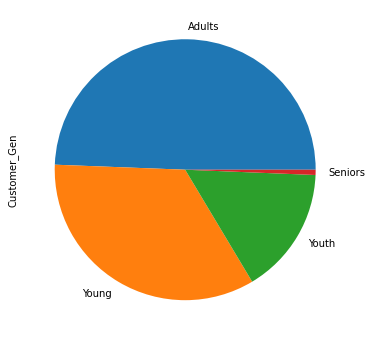

In [106]:
SalesJSON['Customer_Gen'].value_counts().plot(kind='pie', figsize=(6,6))

In [103]:
SalesJSON['Year'].unique()

array(['2016'], dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Revenue'>

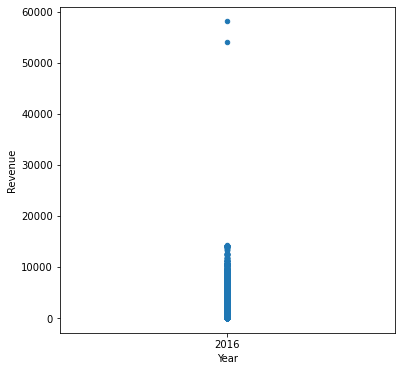

In [107]:
SalesJSON.plot(kind='scatter', x='Year', y='Revenue', figsize=(6,6))